## Model 6 & 7 : Naive Bayes & Logistic Regressor, <i>revisisted</i>
* <b>Logistic Regression</b>, _revisiting_
* ~~Random Forest~~
* <b>Naïve Bayes</b>, _revisiting_
* ~~SVM~~

### Model Performance Summary

Logistic Regression and Naïve Bayes performed the best so far with Count Vectorizer, and endeavor to imporve using TF-IDF was unsusccessful.  Naïve Bayes Multinomial _"normally requires integer feature counts. However, in practice, fractional counts such as TF-IDF may also work._ Term-frequency times inverse document-frequency is a weighting scheme, so while the documentation states it _may_ work, there was no improvement in either Logistic Regression or Naïve Bayes model performance using fractional weights.  

Baseline: `0.5074`


Model   | Transformer       | Classifier            | $n$  | x-val   | Train    | Test   
---     |---                | ---                   | ---  | ---     | ---      | ---    
1*      | Count Vectorizer  | Logistic Regressor    | 2605 | 0.7373  | 0.9723   | 0.7515 
2*      | Count Vectorizer  | Logistic Regressor    | 4537 | 0.7111  | 0.9568   | 0.7436 
3       | Count Vectorizer  | Random Forest	        | 4537 | 0.7569  | 0.9855   | 0.7154 
4       | Count Vectorizer  | Naïve Bayes	        | 4537 | 0.7587  | 0.8628   | 0.7722 
5       | TF-IDF            | SVM                   | 4537 | 0.7834  | 0.9793   | 0.7509   
6       | TF-IDF            | Logistic Regressor    | 4537 | 0.7834  | 0.9671   | 0.7296 
7       | TF-IDF            | Naïve Bayes           | 4537 | 0.7834  | 0.8989   | 0.7659  

In [1]:
##### BASIC IMPORTS 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### MODELLING IMPORTS 
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

##### VECTOR MODELLING IMPORTS 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.feature_extraction import text   # TO MODIFY STOP WORDS 

from nltk.stem import WordNetLemmatizer

In [2]:
# CUSTOM IMPORTS AND SETTINGS 
plt.style.use('gstyle.mplstyle')                        # stylesheet for sns
color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',         # colorlist, color blind pallet
                  '#f781bf', '#a65628', '#984ea3',      # from gist.github.com/thriveth/8560036
                  '#999999', '#e41a1c', '#dede00']

sns.set_palette(sns.color_palette(color_cycle))         # setting custom palette

pd.options.display.max_columns = 90                     # view settings
pd.options.display.max_rows = 100

In [3]:
# importing clean file from model 2
df = pd.read_csv('../data/reddit_2000_clean.csv')
df.dropna(axis=0, inplace = True)
df.shape

(4511, 2)

In [4]:
df.head()

,corpus,class
0,if you look around there are lots of horror st...,1
1,just to close on this tesla replaced the latch...,1
2,it pays to be a tesla owner,1
3,its happening a sub too will try and cross pos...,1
4,dat gullwing mmmm,1


### MODELING

#### Grid and Pipe Setup, Fit, Score

In [8]:
# New Model
X = df['corpus']
y = df['class']

reddit_stopwords = ['porsche', 'tesla', 'taycan', 'model', 'car', 'xplaid', 'turbo']
stopwords = text.ENGLISH_STOP_WORDS.union(reddit_stopwords) 

# train-test split
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X, y, random_state = 42, stratify = y)

pipe = Pipeline([   
    ('tvec', TfidfVectorizer(stop_words = stopwords)),   
    ('lr', LogisticRegression(max_iter = 1000))                  
])


params = {
    'tvec__max_features': [3000, 4000, 5000],
    'tvec__min_df': [2, 3, 4],
    'tvec__max_df': [.7,.95],
    'tvec__ngram_range': [(1,1), (1,2),(1,3)],
    'lr__C': [0.01, 0.1, 0.5, 1.0, 10.0],
    'lr__solver': ['lbfgs', 'liblinear'],
    'lr__n_jobs': [-1], 
}

# Instantiate GridSearchCV.
gs = GridSearchCV(pipe, params, cv = 3)

# FIT gs 
gs.fit(Xt_train, yt_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=frozenset({'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against',
                                                                              'all',
                                                                              'almost',
                                                            

In [11]:
# model metrics 
x= ['LR Train', 'LR,t Train', 'LT,t Test', 'LR Test']
model_mets = [0.9855,0.967188885604493, 0.7296099290780141, 0.7154 ]

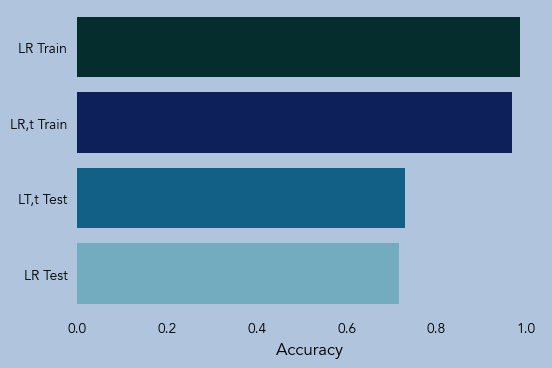

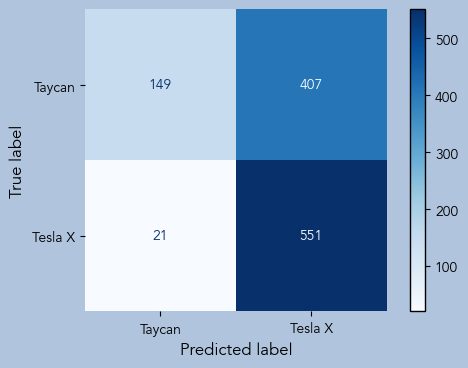

In [12]:
# plot metrics
f, ax = plt.subplots(figsize=(6, 4))
ax.tick_params(bottom=False, left = False)  # remove the ticks
plt.xlabel('Accuracy')

sns.despine(left=True, bottom=True)
sns.barplot(y = x, x = model_mets, palette='ocean')
plt.show()

sub_1 = "Tesla X"
sub_2 = "Taycan"

plot_confusion_matrix(gs, Xt_test, yt_test, cmap = 'Blues', display_labels = [sub_2, sub_1]);
(sns.despine(left=True, bottom=True))

# # Get predictions
preds_tvec = gs.predict(Xt_test)

# # Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(yt_test, preds_tvec).ravel()

In [24]:
# New Model
X = df['corpus']
y = df['class']

reddit_stopwords = ['porsche', 'tesla', 'taycan', 'model', 'car', 'xplaid', 'turbo']
stopwords = text.ENGLISH_STOP_WORDS.union(reddit_stopwords) 

# train-test split
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X, y, random_state = 42, stratify = y)

pipe = Pipeline([   
    ('tvec', TfidfVectorizer(stop_words = stopwords)),   
    ('mnb', MultinomialNB()),          
])

params = {
    'tvec__max_features': [2000, 3_000, 4000, 5000],
    'tvec__min_df': [2, 3, 4],
    'tvec__max_df': [.7,.95],
    'tvec__ngram_range': [(1,1), (1,2),(1,3)],
}

# Instantiate GridSearchCV.
gs = GridSearchCV(pipe, params, cv = 3)

# FIT gs 
gs.fit(Xt_train, yt_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=frozenset({'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against',
                                                                              'all',
                                                                              'almost',
                                                            

In [23]:
gs.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tvec', 'mnb', 'tvec__analyzer', 'tvec__binary', 'tvec__decode_error', 'tvec__dtype', 'tvec__encoding', 'tvec__input', 'tvec__lowercase', 'tvec__max_df', 'tvec__max_features', 'tvec__min_df', 'tvec__ngram_range', 'tvec__norm', 'tvec__preprocessor', 'tvec__smooth_idf', 'tvec__stop_words', 'tvec__strip_accents', 'tvec__sublinear_tf', 'tvec__token_pattern', 'tvec__tokenizer', 'tvec__use_idf', 'tvec__vocabulary', 'mnb__alpha', 'mnb__class_prior', 'mnb__fit_prior'])

In [25]:
# evaluate, score on training set.
gs.best_score_, gs.score(Xt_train, yt_train), gs.score(Xt_test, yt_test)

(0.7484514002949315, 0.8989062961868164, 0.7659574468085106)

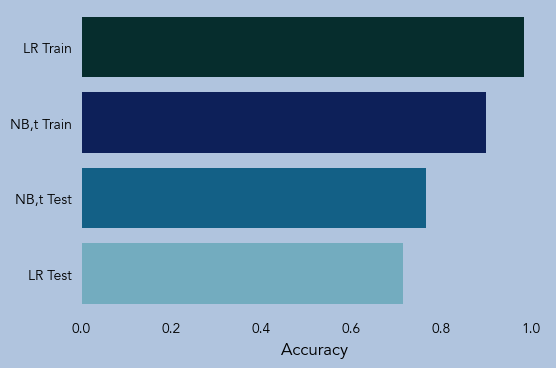

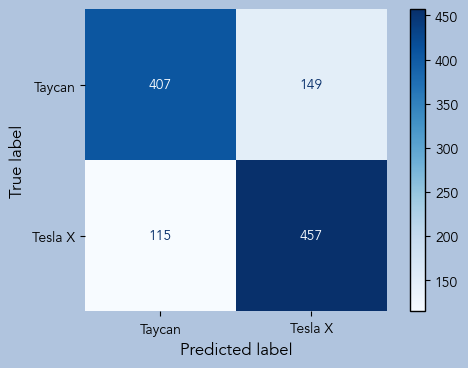

In [27]:
# model metrics 
x= ['LR Train', 'NB,t Train', 'NB,t Test', 'LR Test']
model_mets = [0.9855, 0.8989062961868164, 0.7659574468085106, 0.7154 ]

# plot metrics
f, ax = plt.subplots(figsize=(6, 4))
ax.tick_params(bottom=False, left = False)  # remove the ticks
plt.xlabel('Accuracy')

sns.despine(left=True, bottom=True)
sns.barplot(y = x, x = model_mets, palette='ocean')
plt.show()

sub_1 = "Tesla X"
sub_2 = "Taycan"

plot_confusion_matrix(gs, Xt_test, yt_test, cmap = 'Blues', display_labels = [sub_2, sub_1]);
(sns.despine(left=True, bottom=True))

# # Get predictions
preds_tvec = gs.predict(Xt_test)

# # Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(yt_test, preds_tvec).ravel()

In [5]:
# New Model
X = df['corpus']
y = df['class']

reddit_stopwords = ['porsche', 'tesla', 'taycan', 'model', 'car', 'xplaid', 'turbo']
stopwords = text.ENGLISH_STOP_WORDS.union(reddit_stopwords) 

# train-test split
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X, y, random_state = 42, stratify = y)

pipe = Pipeline([   
    ('cvec', CountVectorizer(stop_words = stopwords)),   
    ('mnb', MultinomialNB()),          
])

params = {
    'cvec__max_features': [2000, 3_000, 4000, 5000],
    'cvec__min_df': [2, 3, 4],
    'cvec__max_df': [.7,.95],
    'cvec__ngram_range': [(1,1), (1,2),(1,3)], 
    'cvec__stop_words': [stopwords],
}

# Instantiate GridSearchCV.
gs = GridSearchCV(pipe, params, cv = 3)

# FIT gs 
gs.fit(Xt_train, yt_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=frozenset({'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against',
                                                                              'all',
                                                                              'almost',
                                                            

In [7]:
gs.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.7, max_features=5000, min_df=2,
                                 ngram_range=(1, 3),
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
            

In [8]:
# evaluate, score on training set.
gs.best_score_, gs.score(Xt_train, yt_train), gs.score(Xt_test, yt_test)

(0.7587975985954047, 0.8628436299142773, 0.7721631205673759)

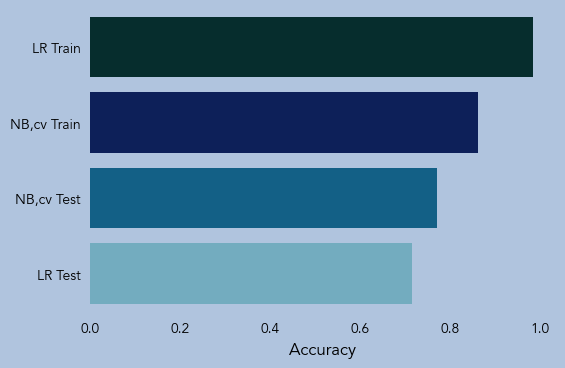

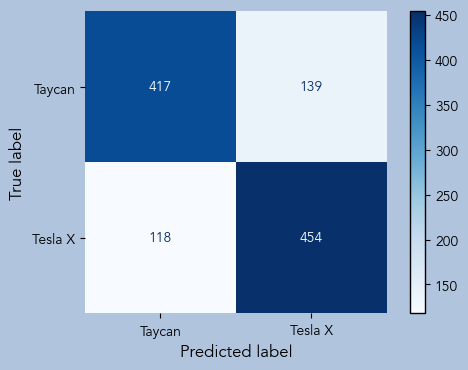

In [11]:
# model metrics 
x= ['LR Train', 'NB,cv Train', 'NB,cv Test', 'LR Test']
model_mets = [0.9855, 0.8628436299142773, 0.7721631205673759, 0.7154 ]

# plot metrics
f, ax = plt.subplots(figsize=(6, 4))
ax.tick_params(bottom=False, left = False)  # remove the ticks
plt.xlabel('Accuracy')

sns.despine(left=True, bottom=True)
sns.barplot(y = x, x = model_mets, palette='ocean')
plt.show()

sub_1 = "Tesla X"
sub_2 = "Taycan"

plot_confusion_matrix(gs, Xt_test, yt_test, cmap = 'Blues', display_labels = [sub_2, sub_1]);
(sns.despine(left=True, bottom=True))

# # Get predictions
preds_tvec = gs.predict(Xt_test)

# # Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(yt_test, preds_tvec).ravel()